# Visualization 

### Q1
1. Load the `./data/college_completion.csv` data with Pandas.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the data 
df = pd.read_csv('./hw data/college_completion.csv')

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

There are 3,798 rows and 63 columns in the data frame. There are 3,798 observations. There are 63 variables. Some of them are about the university itself, like location. Some are regarding their graduation and retention rates. Some are regarding their transfer students. 

In [3]:
# print out dimensions using shape
print(df.shape)

# print out columns to see all variables
print(df.columns)

(3798, 63)
Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6

3. Cross tabulate `control` and `level`. Describe the patterns you see.

There are more 4-year colleges than 2-year colleges and more public colleges than either type of private. There are barely any 2-year private not-for-profit colleges, however a very large amount of 4-year private not-for-private. The number of 4-year not-for-profit is about double the number of 4-year private for profit as well as 4-year public. The number of 2-year public colleges ia also almost double the number of private for-profit colleges. 

In [4]:
# creating cross table 
c = pd.crosstab(df['control'], df['level'], margins=True)
c

level,2-year,4-year,All
control,,,
Private for-profit,465,527,992
Private not-for-profit,68,1180,1248
Public,926,632,1558
All,1459,2339,3798


4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.

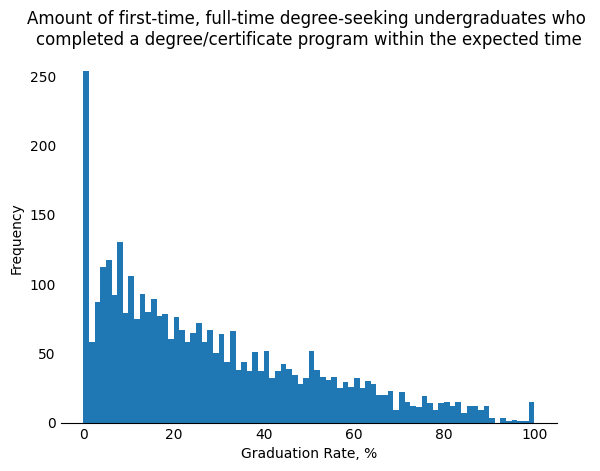

In [5]:
# histogram for grad_100_value
plt.hist(df['grad_100_value'], bins=80)

# title
plt.title("Amount of first-time, full-time degree-seeking undergraduates who \ncompleted a degree/certificate program within the expected time")

# axis labels 
plt.xlabel("Graduation Rate, %")
plt.ylabel("Frequency")

# remove spines and ticks 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)

# display graph
plt.show()

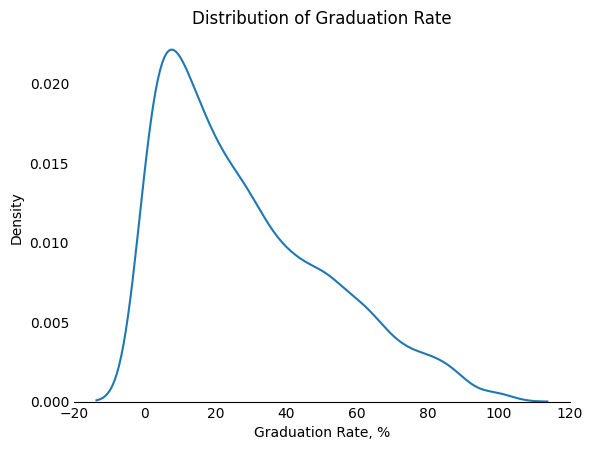

In [6]:
# kernel density plot
sns.kdeplot(data=df, x='grad_100_value')

# title
plt.title("Distribution of Graduation Rate")

# axis labels
plt.xlabel("Graduation Rate, %")

# remove spines and ticks 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)

# display graph
plt.show()

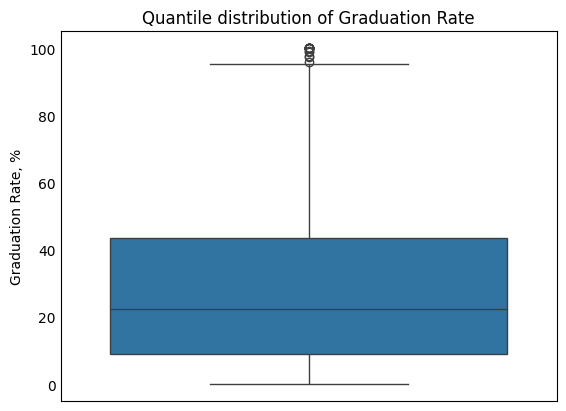

In [7]:
# boxplot 
sns.boxplot(data=df, y='grad_100_value')

# title 
plt.title("Quantile distribution of Graduation Rate")

# axis label
plt.ylabel("Graduation Rate, %")

# remove ticks
plt.tick_params(axis='both', which='both', length=0)

# display graph 
plt.show() 

In [8]:
# statistical description
df['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?

It seems like the line for the 2-year level has a similar peak shape as the public control does. Additionally, it appears as if the 4-year level peak shape is a combination of both the types of private control. 4-year colleges and private not-for-profit colleges appear to have the best graduation rates.

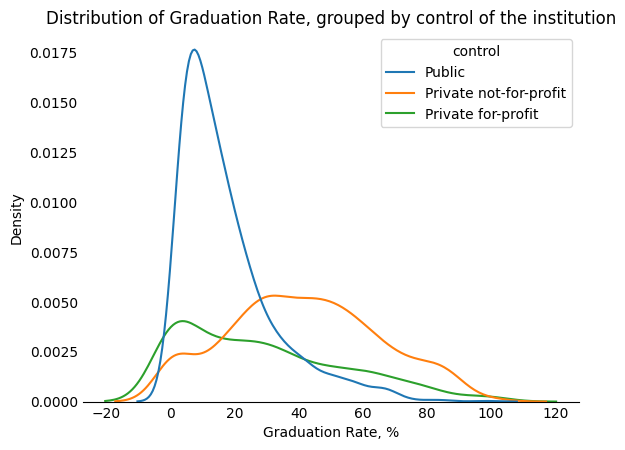

In [9]:
# grouped kde plot for control
sns.kdeplot(data=df, x='grad_100_value', hue='control')

# title
plt.title("Distribution of Graduation Rate, grouped by control of the institution")

# axis labels
plt.xlabel("Graduation Rate, %")

# remove spines and ticks 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)

plt.show()

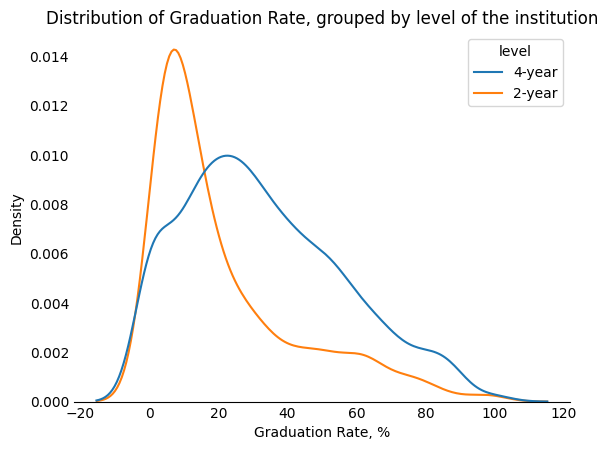

In [10]:
# grouped kde plot for level
sns.kdeplot(data=df, x='grad_100_value', hue='level')

# title
plt.title("Distribution of Graduation Rate, grouped by level of the institution")

# axis labels
plt.xlabel("Graduation Rate, %")

# remove spines and ticks 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)

plt.show()

In [11]:
# grouped statistical description by level
df.loc[:,['grad_100_value', 'level']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

In [12]:
# grouped statistical description by control
df.loc[:,['grad_100_value', 'control']].groupby('control').describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

2-year Public insitutions appear to have the best graduation rate.

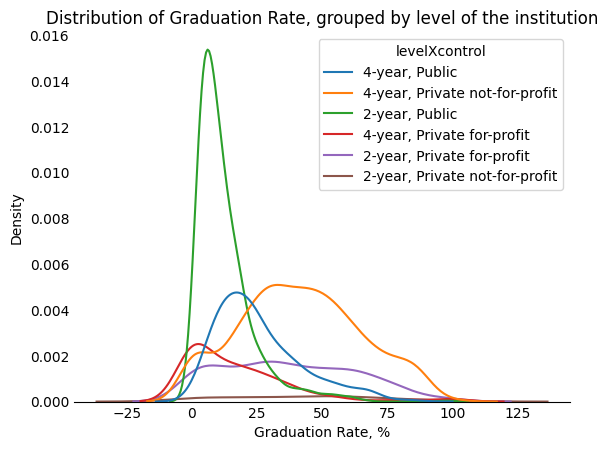

In [13]:
# creating new variable
df['levelXcontrol'] = df['level'] + ', ' + df['control']

# grouped kde
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol')

# title
plt.title("Distribution of Graduation Rate, grouped by level of the institution")

# axis labels
plt.xlabel("Graduation Rate, %")

# remove spines and ticks 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)

plt.show()

7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.

Both the grouped kernel density plots have large peaks just under 10,000 USD, which explains the large peak just under 10,000 USD in the general kernerl density plot. 

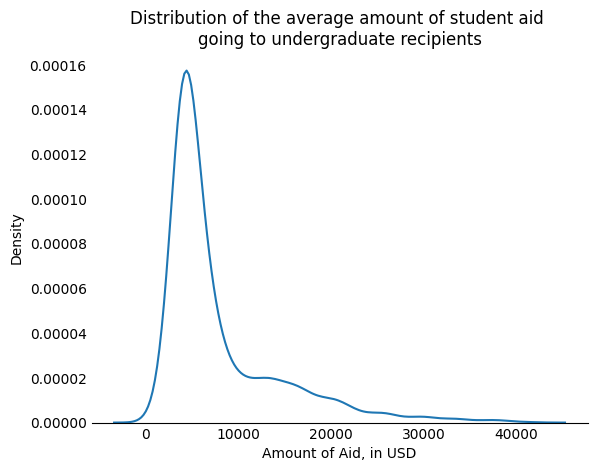

In [14]:
# kde plot fot aid_value
sns.kdeplot(data=df, x='aid_value')

# title
plt.title("Distribution of the average amount of student aid \ngoing to undergraduate recipients")

# axis labels
plt.xlabel("Amount of Aid, in USD")

# remove spines and ticks 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)

plt.show()

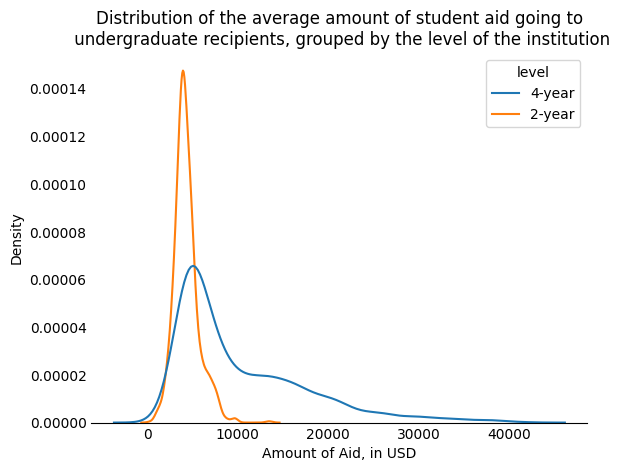

In [15]:
# grouped kde plot of aid_value by level
sns.kdeplot(data=df, x='aid_value', hue='level')

# title
plt.title("Distribution of the average amount of student aid going to\n undergraduate recipients, grouped by the level of the institution")

# axis labels
plt.xlabel("Amount of Aid, in USD")

# remove spines and ticks 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)

plt.show()

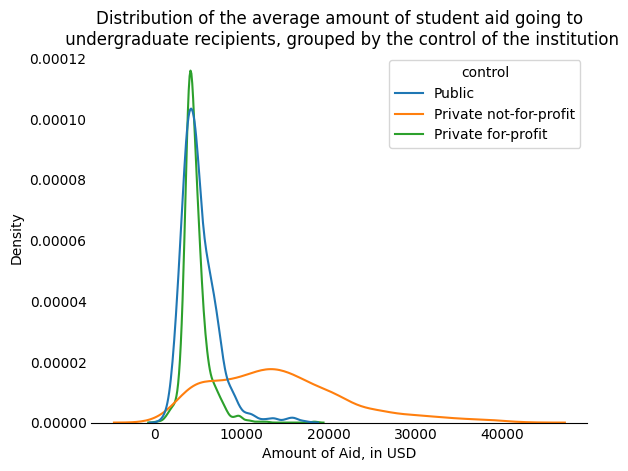

In [16]:
# grouped kde plot of aid_value by control
sns.kdeplot(data=df, x='aid_value', hue='control')

# title
plt.title("Distribution of the average amount of student aid going to\n undergraduate recipients, grouped by the control of the institution")

# axis labels
plt.xlabel("Amount of Aid, in USD")

# remove spines and ticks 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)

plt.show()

In [17]:
# grouped statistical description by level
df.loc[:,['aid_value', 'level']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

In [18]:
# grouped statistical description by control
df.loc[:,['aid_value', 'control']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

There seems to be a slightly positive correlation between graduation rate and amount of aid given. There are plenty of outliers there as well. Looking at the scatterplot that is grouped by level of the institution, there is a clear distinction in the graph between the 2-year and 4-year institutions. All of the 2-year institutions don't give more than 10,000 USD, except for one or two outliers. Looking at the scatterplot that is grouped by control, there is a pretty clear distinction between private not-for-profit institutions and then public and private for-profit institutions. Public and private for-profit institutions again don't give aid above 10,000 USD, but there are more outliers than there were with the 2-year institutions. 4-year private not-for-profit institutions seem to have the biggest and most related increase in their graduation rate with an increase in aid. 

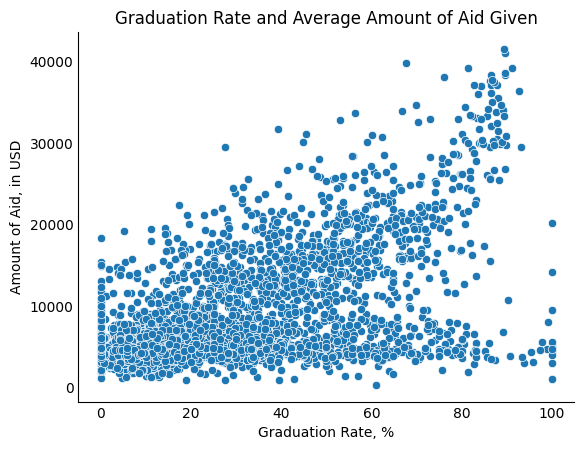

In [19]:
# scatter plot of grad_100_value by aid_value
sns.scatterplot(data=df, x='grad_100_value', y='aid_value')

# title
plt.title("Graduation Rate and Average Amount of Aid Given")

# axis labels
plt.xlabel("Graduation Rate, %")
plt.ylabel("Amount of Aid, in USD")

# remove spines and ticks 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)
plt.show()

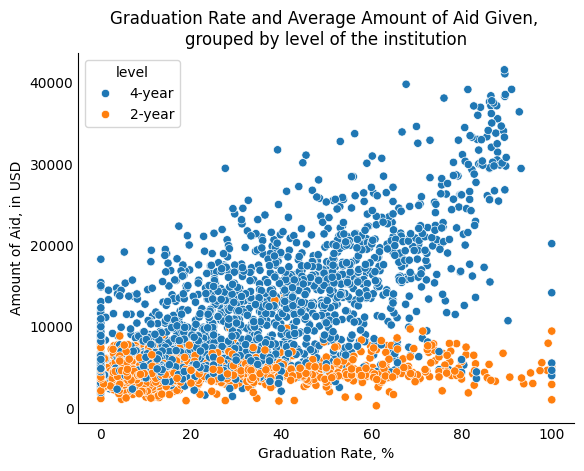

In [20]:
# scatter plot of grad_100_value by aid_value, grouped by level
sns.scatterplot(data=df, x='grad_100_value', y='aid_value', hue='level')

# title
plt.title("Graduation Rate and Average Amount of Aid Given, \ngrouped by level of the institution")

# axis labels
plt.xlabel("Graduation Rate, %")
plt.ylabel("Amount of Aid, in USD")

# remove spines and ticks 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)
plt.show()

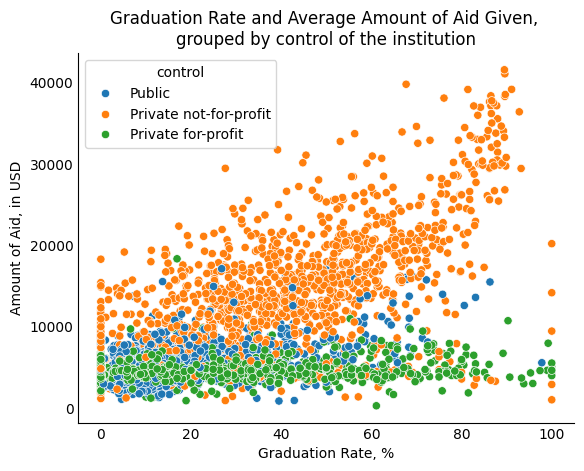

In [21]:
# scatter plot of grad_100_value by aid_value, grouped by control
sns.scatterplot(data=df, x='grad_100_value', y='aid_value', hue='control')

# title
plt.title("Graduation Rate and Average Amount of Aid Given, \ngrouped by control of the institution")

# axis labels
plt.xlabel("Graduation Rate, %")
plt.ylabel("Amount of Aid, in USD")

# remove spines and ticks 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)
plt.show()